Twitter Sentiment Results for xPhone Ultra (First 10 Rows):
              Comment_Text    Comment_Text_Clean  NLP_Score Sentiment
0               It's fine.              its fine     0.2023  positive
1      No strong feelings.    no strong feelings    -0.4023  negative
2    Not sure what to say.  not sure what to say    -0.2411  negative
3              Worst ever!            worst ever    -0.6249  negative
4                Horrible!              horrible    -0.5423  negative
5               Fantastic!             fantastic     0.5574  positive
6  I can't believe this...   i cant believe this     0.0000   neutral
7        This made my day!      this made my day     0.0000   neutral
8  I can't believe this...   i cant believe this     0.0000   neutral
9         Nothing special.       nothing special    -0.3089  negative

xPhone Ultra Twitter Sentiment Distribution (NLP):
Positive: 376 (37.6%)
Negative: 440 (44.0%)
Neutral: 184 (18.4%)



Average Likes by xPhone Ultra Twitter Sentiment (NLP):
Sentiment
negative    2517.990909
neutral     2463.505435
positive    2524.515957
Name: Likes_Count, dtype: float64


<ipython-input-4-7da218eb0011>:99: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.



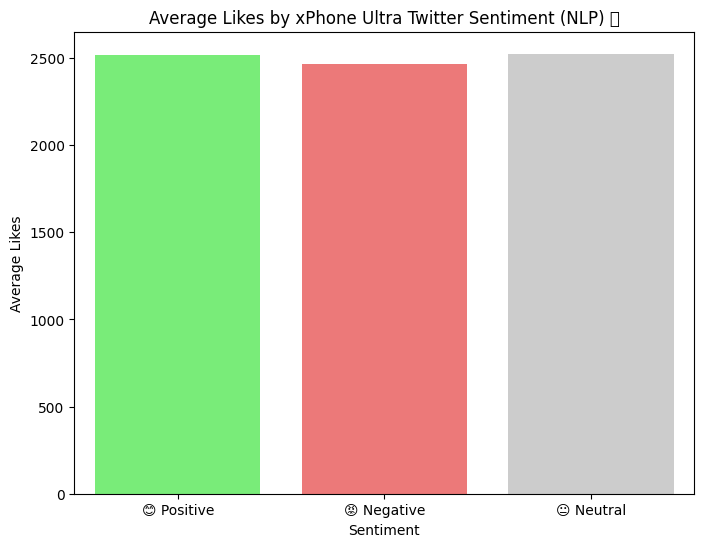


Most Liked xPhone Ultra Twitter Comments by Sentiment (NLP):
Negative: "Horrible!" by user_87 (2024-11-28 08:02:34.921145, 4998 likes)
Neutral: "I've seen this before." by user_57 (2024-10-20 02:32:35.921145, 4995 likes)
Positive: "It's fine." by user_99 (2024-12-20 17:49:07.921145, 4995 likes)

=== xPhone Ultra Twitter Emoji Sentiment Final Report (NLP) ===

Sentiment Distribution 😊😡😐
Total Tweets: 1000
😊 Positive: 376 (37.6%)
😡 Negative: 440 (44.0%)
😐 Neutral: 184 (18.4%)

Sentiment Trends Over Time 📈
2024-09: 😊 35.1% | 😡 45.2% | 😐 19.6%
2024-10: 😊 41.0% | 😡 39.2% | 😐 19.9%
2024-11: 😊 36.5% | 😡 43.6% | 😐 19.9%
2024-12: 😊 37.9% | 😡 45.2% | 😐 16.9%
2025-01: 😊 35.5% | 😡 48.5% | 😐 16.0%
2025-02: 😊 40.6% | 😡 40.6% | 😐 18.8%
2025-03: 😊 34.6% | 😡 50.0% | 😐 15.4%

Likes and Sentiment 👍
😊 Positive: 2525 👍
😡 Negative: 2518 👍
😐 Neutral: 2464 👍

Top Tweets by Sentiment 🏆
😡 Negative: "Horrible!" by user_87 (2024-11-28 08:02:34.921145, 4998 👍)
😐 Neutral: "I've seen this before." by user_57 (2024-

In [4]:
# Install dependencies (run once in Colab)
!pip install plotly seaborn vaderSentiment

# Import the tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re  # For text preprocessing

# Load your Twitter-like comments.csv file (upload it to Colab first)
df = pd.read_csv('comments.csv')

# Drop the Sentiment_Label column (we’re doing NLP from scratch)
df = df.drop(columns=['Sentiment_Label'])

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# --- NLP Preprocessing and Sentiment Analysis for xPhone Ultra ---
def preprocess_text(text):
    """Preprocess text: lowercase, remove punctuation, keep alphanumeric and spaces."""
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

analyzer = SentimentIntensityAnalyzer()
# Apply preprocessing
df['Comment_Text_Clean'] = df['Comment_Text'].apply(preprocess_text)
# Extract sentiment scores with VADER
df['NLP_Score'] = df['Comment_Text_Clean'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
# Assign sentiment labels
df['Sentiment'] = df['NLP_Score'].apply(lambda x: 'positive' if x > 0.05 else 'negative' if x < -0.05 else 'neutral')

# Show first few rows to see preprocessing and NLP results
print("Twitter Sentiment Results for xPhone Ultra (First 10 Rows):")
print(df[['Comment_Text', 'Comment_Text_Clean', 'NLP_Score', 'Sentiment']].head(10))

# --- Sentiment Distribution (Plotly Pie Chart) ---
sentiment_counts = df['Sentiment'].value_counts()
total_comments = len(df)
sentiment_percentages = (sentiment_counts / total_comments) * 100

print("\nxPhone Ultra Twitter Sentiment Distribution (NLP):")
print(f"Positive: {sentiment_counts['positive']} ({sentiment_percentages['positive']:.1f}%)")
print(f"Negative: {sentiment_counts['negative']} ({sentiment_percentages['negative']:.1f}%)")
print(f"Neutral: {sentiment_counts['neutral']} ({sentiment_percentages['neutral']:.1f}%)")

fig = px.pie(
    names=sentiment_counts.index,
    values=sentiment_counts.values,
    title='xPhone Ultra Twitter Sentiment Distribution (NLP) 😊😡😐',
    color_discrete_sequence=['#66ff66', '#ff6666', '#cccccc']
)
fig.update_traces(
    text=[f"😊 Positive" if x == 'positive' else f"😡 Negative" if x == 'negative' else f"😐 Neutral" for x in sentiment_counts.index],
    textinfo='text+percent',
    textposition='inside'
)
fig.show()

# --- Sentiment Trends Over Time (Plotly Line Graph) ---
df['Month'] = df['Timestamp'].dt.to_period('M')
monthly_sentiment = df.groupby(['Month', 'Sentiment']).size().unstack(fill_value=0)
monthly_totals = monthly_sentiment.sum(axis=1)
monthly_percentages = monthly_sentiment.div(monthly_totals, axis=0) * 100

monthly_percentages_reset = monthly_percentages.reset_index().melt(id_vars=['Month'], var_name='Sentiment', value_name='Percentage')
monthly_percentages_reset['Month'] = monthly_percentages_reset['Month'].astype(str)
monthly_percentages_reset['Sentiment'] = monthly_percentages_reset['Sentiment'].map({
    'positive': '😊 Positive', 'negative': '😡 Negative', 'neutral': '😐 Neutral'
})

fig = px.line(
    monthly_percentages_reset,
    x='Month',
    y='Percentage',
    color='Sentiment',
    title='xPhone Ultra Twitter Sentiment Trends Over Time (NLP) 📈',
    markers=True,
    color_discrete_map={'😊 Positive': '#66ff66', '😡 Negative': '#ff6666', '😐 Neutral': '#cccccc'}
)
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Percentage (%)',
    legend_title='Sentiment',
    xaxis_tickangle=-45
)
fig.show()

# --- Likes and Sentiment (Seaborn Bar Chart) ---
likes_by_sentiment = df.groupby('Sentiment')['Likes_Count'].mean()
print("\nAverage Likes by xPhone Ultra Twitter Sentiment (NLP):")
print(likes_by_sentiment)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=likes_by_sentiment.index,
    y=likes_by_sentiment.values,
    palette=['#66ff66', '#ff6666', '#cccccc']
)
plt.title('Average Likes by xPhone Ultra Twitter Sentiment (NLP) 👍')
plt.xlabel('Sentiment')
plt.ylabel('Average Likes')
plt.xticks(ticks=range(3), labels=['😊 Positive', '😡 Negative', '😐 Neutral'], rotation=0)
plt.show()

# --- Top Comments by Sentiment ---
top_comments = df.loc[df.groupby('Sentiment')['Likes_Count'].idxmax()]
print("\nMost Liked xPhone Ultra Twitter Comments by Sentiment (NLP):")
for _, row in top_comments.iterrows():
    print(f"{row['Sentiment'].capitalize()}: \"{row['Comment_Text']}\" by {row['Username']} "
          f"({row['Timestamp']}, {row['Likes_Count']} likes)")

# --- Emoji Sentiment Final Report (NLP) ---
print("\n=== xPhone Ultra Twitter Emoji Sentiment Final Report (NLP) ===")
print("\nSentiment Distribution 😊😡😐")
print(f"Total Tweets: {len(df)}")
print(f"😊 Positive: {sentiment_counts['positive']} ({sentiment_percentages['positive']:.1f}%)")
print(f"😡 Negative: {sentiment_counts['negative']} ({sentiment_percentages['negative']:.1f}%)")
print(f"😐 Neutral: {sentiment_counts['neutral']} ({sentiment_percentages['neutral']:.1f}%)")

print("\nSentiment Trends Over Time 📈")
for month in monthly_sentiment.index:
    pos = monthly_percentages.loc[month, 'positive'] if 'positive' in monthly_percentages.columns else 0
    neg = monthly_percentages.loc[month, 'negative'] if 'negative' in monthly_percentages.columns else 0
    neu = monthly_percentages.loc[month, 'neutral'] if 'neutral' in monthly_percentages.columns else 0
    print(f"{month}: 😊 {pos:.1f}% | 😡 {neg:.1f}% | 😐 {neu:.1f}%")

print("\nLikes and Sentiment 👍")
print(f"😊 Positive: {likes_by_sentiment['positive']:.0f} 👍")
print(f"😡 Negative: {likes_by_sentiment['negative']:.0f} 👍")
print(f"😐 Neutral: {likes_by_sentiment['neutral']:.0f} 👍")

print("\nTop Tweets by Sentiment 🏆")
for _, row in top_comments.iterrows():
    emoji = '😊' if row['Sentiment'] == 'positive' else '😡' if row['Sentiment'] == 'negative' else '😐'
    print(f"{emoji} {row['Sentiment'].capitalize()}: \"{row['Comment_Text']}\" by {row['Username']} "
          f"({row['Timestamp']}, {row['Likes_Count']} 👍)")